In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC

In [2]:
dir = "C:\\Users\\20106\\Downloads\\train"

In [3]:
categories = ['Cats','Dogs']
data=[]

In [4]:
for category in categories:
    path= os.path.join(dir,category)
    label = categories.index(category)
    
    for img in os.listdir(path):
        imgpath = os.path.join(path,img)
        petimg = cv2.imread(imgpath,0)
        try:
            petimg=cv2.resize(petimg,(50,50))
            image = np.array(petimg).flatten()
            
            data.append([image,label])
            
        except Exception as e:
            pass
    

print(len(data))

25000


In [5]:
pick_in = open('data.pickle','wb')
pickle.dump(data,pick_in)
pick_in.close

<function BufferedWriter.close>

In [6]:
pick_in = open('data.pickle','rb')
pickledata = pickle.load(pick_in)
pick_in.close

<function BufferedReader.close>

In [7]:
features = []
labels = []

In [8]:
for feature,label in pickledata:
    features.append(feature)
    labels.append(label)

In [9]:
xtrain, xtest, ytrain, ytest = train_test_split(features,labels,test_size=0.25)

In [11]:
model = SVC(kernel='sigmoid', gamma = 'auto')

scores = cross_val_score(model, xtrain, ytrain, cv=5)  

print(f'Cross-Validation Scores: {scores}')
print(f'Mean Cross-Validation Score: {scores.mean()}')

Cross-Validation Scores: [0.50586667 0.50586667 0.5056     0.5056     0.5056    ]
Mean Cross-Validation Score: 0.5057066666666667


In [12]:
model.fit(xtrain,ytrain)

SVC(gamma='auto', kernel='sigmoid')

In [13]:
pick = open('model.sav','wb')
pickle.dump(model,pick)
pick.close

<function BufferedWriter.close>

In [14]:
ypred = model.predict(xtest)

In [15]:
accuracy = model.score(xtest,ytest)

In [16]:
print('Accuracy: ',accuracy)
print('Prediction is: ',categories[ypred[0]])

Accuracy:  0.48288
Prediction is:  Cats


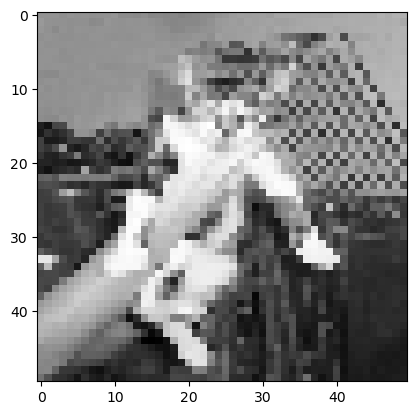

In [17]:
mypet = xtest[0].reshape(50,50)
plt.imshow(mypet,cmap='gray')
plt.show()